**Paired t-test on WER Scores:**

In [1]:
from scipy.stats import ttest_rel

# Example WER scores for two ASR systems on the same files
wer_model_A = [0.29, 0.31, 0.28, 0.30, 0.27]
wer_model_B = [0.24, 0.26, 0.25, 0.27, 0.23]

# Paired t-test
t_stat, p_value = ttest_rel(wer_model_A, wer_model_B)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Difference is statistically significant")
else:
    print("Difference is NOT statistically significant")


t-statistic: 8.944271909999161
p-value: 0.0008642110288826965
Difference is statistically significant


p < 0.05 - statistically significant improvement

p ≥ 0.05 - difference may be due to chance

**Continuous Monitoring Loop**

In [2]:
import time

# Simulated production metrics stream
production_metrics = [
    {"wer": 0.22, "latency": 1.2},
    {"wer": 0.24, "latency": 1.3},
    {"wer": 0.35, "latency": 2.5},  # degradation
]

WER_THRESHOLD = 0.30
LATENCY_THRESHOLD = 2.0

for metric in production_metrics:
    if metric["wer"] > WER_THRESHOLD or metric["latency"] > LATENCY_THRESHOLD:
        print("Alert: Performance degradation detected", metric)
    else:
        print("System healthy", metric)
    time.sleep(1)


System healthy {'wer': 0.22, 'latency': 1.2}
System healthy {'wer': 0.24, 'latency': 1.3}
Alert: Performance degradation detected {'wer': 0.35, 'latency': 2.5}


In [4]:
pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.0 MB/s eta 0:00:00


**Tool and Implementation:**

**ASR evaluation**

In [5]:
from jiwer import wer

reference = "patient has diabetes and hypertension"
hypothesis = "patient has diabetes and high tension"

error_rate = wer(reference, hypothesis)
print("WER:", error_rate)


WER: 0.4


**Scispacy**

In [16]:
pip install spacy scispacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is inc

In [1]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.1/183.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.1 MB/s eta 0:00:00
  Created wheel for en_core_sci_sm: filename=en_core_sci_sm-0.5.4-py3-none-any.whl size=14778488 sha256=59a6263f98b339a8e97fefaca3e76851a876aca2fdb1bba9f4b536ec6e30d4a7
  Stored in directory: /root/.cache/pip/wheels/49/7f/0f/ec0fc3a935bfe55e6ef2ca04b7a31e33cbd533a6d7cbd9e11e
Successfully built en_core_sci_sm
  Attempting uninstall: blis
    Found existing installation: blis 1.3.3
    Uninstalling blis-1.3.3:
      Successfully uninstalled blis-1.3.3
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.10
    Uninstalling thinc-8.3.10:

In [2]:
import spacy
nlp = spacy.load("en_core_sci_sm")
doc = nlp("Patient prescribed insulin for diabetes")
print([(ent.text, ent.label_) for ent in doc.ents])


/usr/local/lib/python3.12/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


[('Patient', 'ENTITY'), ('insulin', 'ENTITY'), ('diabetes', 'ENTITY')]


**stanza**

In [14]:
pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 39.3 MB/s eta 0:00:00


In [15]:
import stanza
stanza.download("en")
nlp = stanza.Pipeline("en", processors="tokenize,ner")
doc = nlp("Patient has hypertension")
print([(ent.text, ent.type) for ent in doc.ents])


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[]


**Levenshtein Distance:**

In [9]:
def levenshtein(a, b):
    n, m = len(a), len(b)
    dp = [[0]*(m+1) for _ in range(n+1)]
    for i in range(n+1): dp[i][0] = i
    for j in range(m+1): dp[0][j] = j
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = 0 if a[i-1] == b[j-1] else 1
            dp[i][j] = min(
                dp[i-1][j] + 1,      # deletion
                dp[i][j-1] + 1,      # insertion
                dp[i-1][j-1] + cost  # substitution
            )
    return dp[n][m]

print(levenshtein("insulin", "insuline"))


1


**Alignment Output:**

In [10]:
from difflib import ndiff

ref = "patient prescribed insulin 10 units".split()
hyp = "patient prescribed insulin 100 units".split()

for d in ndiff(ref, hyp):
    if d.startswith(("- ", "+ ")):
        print(d)


- 10
+ 100


**Error Distribution Bar Chart**

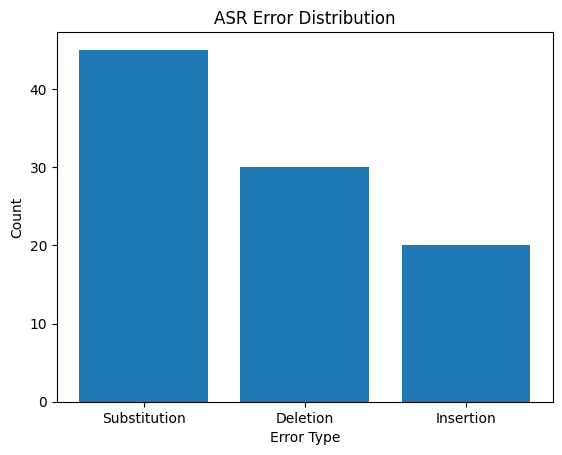

In [11]:
import matplotlib.pyplot as plt

error_counts = {
    "Substitution": 45,
    "Deletion": 30,
    "Insertion": 20
}

plt.bar(error_counts.keys(), error_counts.values())
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.title("ASR Error Distribution")
plt.show()


**Confusion Matrix Visualization**

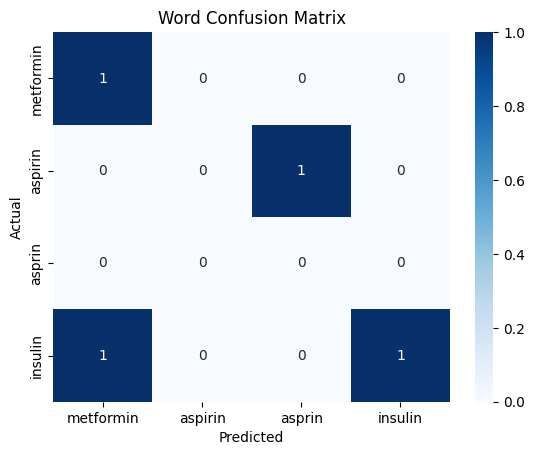

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

true_labels = ["insulin", "insulin", "metformin", "aspirin"]
pred_labels = ["insulin", "metformin", "metformin", "asprin"]

labels = list(set(true_labels + pred_labels))
cm = confusion_matrix(true_labels, pred_labels, labels=labels)

sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Word Confusion Matrix")
plt.show()


**Alignment-Based Error Highlighting**

In [13]:
from difflib import ndiff

ref = "patient prescribed insulin 10 units".split()
hyp = "patient prescribed insulin 100 units".split()

for d in ndiff(ref, hyp):
    print(d)


  patient
  prescribed
  insulin
- 10
+ 100
?   +

  units
